# Análise exploratória de dados

In [6]:
# importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Descrição dos dados

<picture>
  <img src="https://github.com/allisonhorst/palmerpenguins/blob/main/man/figures/culmen_depth.png" 
       alt="Os Pinguins da pesquisa palmerpenguins" 
       width="600" 
       style="display: block; margin: auto;">
</picture>


**Quantidade de instâncias**
O conjunto de dados contém informações sobre 344 pinguins, pertencentes a três espécies diferentes, que foram observados em três ilhas distintas no Arquipélago Palmer, localizado na Antártida. As três espécies de pinguins presentes são Adelie, Chinstrap e Gentoo, sendo que as observações foram feitas em três ilhas: Torgersen, Biscoe e Dream.

**Variáveis**
1. especies: Representa a espécie do pinguim. Tipo qualitativo nominal.
2. ilha: Indica a ilha onde o pinguim foi observado. Tipo qualitativo nominal.
3. comprimento_do_bico_mm: Comprimento do bico do pinguim em milímetros. Tipo quantitativo contínuo.
4. profundidade_do_bico_mm: Profundidade do bico do pinguim em milímetros. Tipo quantitativo contínuo.
5. comprimento_do_nadadeira_mm: Comprimento da nadadeira do pinguim em milímetros. Tipo quantitativo contínuo.
6. massa_corporal_g: Massa corporal do pinguim em gramas. Tipo quantitativo contínuo.
7. sexo: Indica o sexo do pinguim (Masculino ou Feminino). Tipo qualitativo nominal.

In [8]:
# Carregar o dataset do link
df = pd.read_csv('https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/penguins.csv')

# Exibir as primeiras linhas para verificar se foi carregado corretamente
print(df.head())

# Leitura do conjunto de dados 
df = pd.read_csv("../data/raw/data.csv")
df

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
## Dicionário de Dados
dictionary = '../data/external/dictionary.csv'
dt_dict = pd.read_csv(dictionary)

# Exibe dicionário
dt_dict

,variavel,descricao,tipo,subtipo
0,species,"Espécie do pinguim (Adelie, Chinstrap, Gentoo)",qualitativa,nominal
1,bill_length_mm,Comprimento do bico em milímetros,quantitativa,contínua
2,bill_depth_mm,Profundidade do bico em milímetros,quantitativa,contínua
3,island,"Ilha onde o pinguim foi encontrado (Biscoe, Dr...",qualitativa,nominal
4,flipper_length_mm,Comprimento da nadadeira em milímetros,quantitativa,contínua
5,body_mass_g,Massa corporal em gramas,quantitativa,contínua
6,sex,Sexo do pinguim (Masculino ou Feminino),qualitativa,nominal
7,year,Ano em que os dados foram coletados,quantitativa,discreta


## Tratamento de Dados

In [11]:
# Tratamento de valores faltantes para todas as colunas
# Preencher colunas numéricas com a média
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

# Preencher colunas categóricas com a moda
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Verificar
print(df.isnull().sum())


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


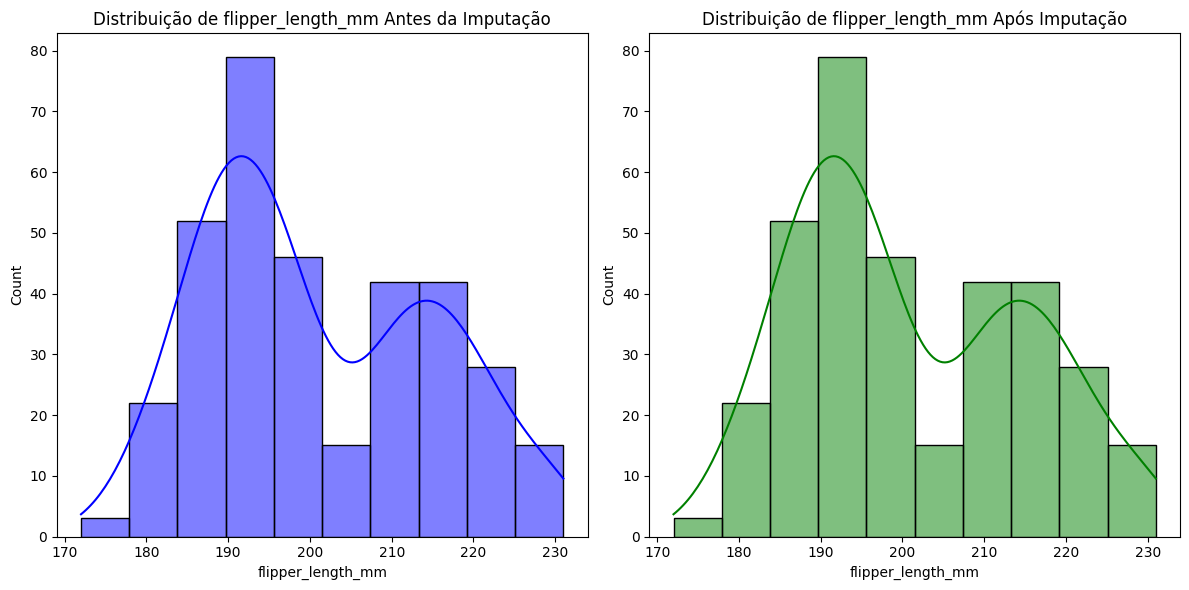

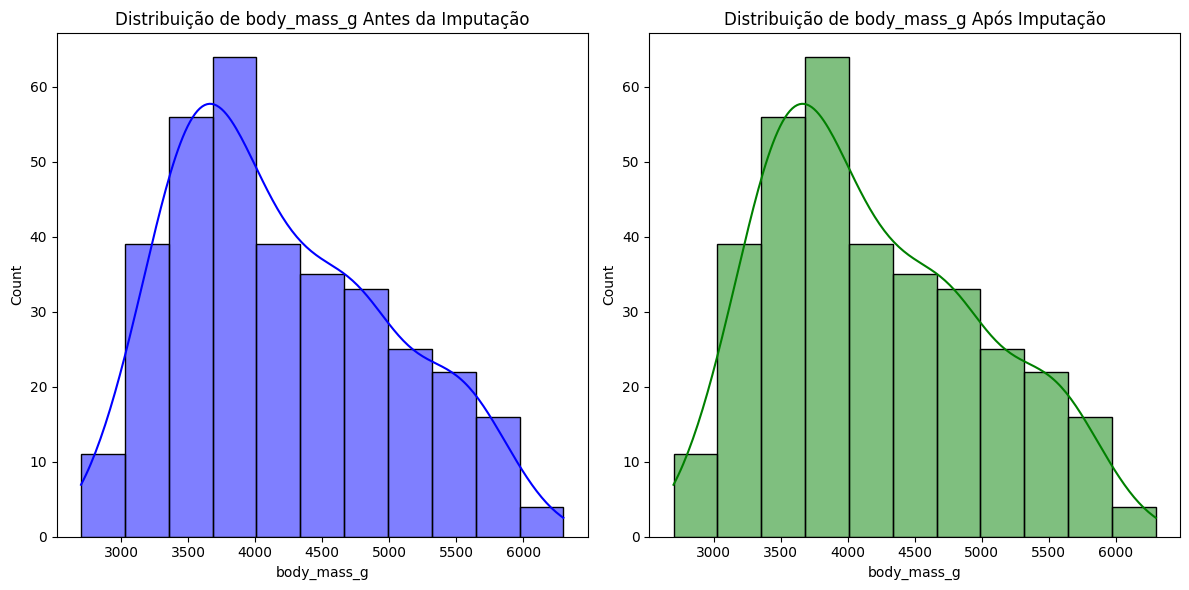

In [17]:
# Visualizar distribuição antes e depois da imputação para variáveis numéricas
# 'flipper_length_mm' e 'body_mass_g'

# Visualizar dados antes da imputação
plt.figure(figsize=(12, 6))

# 'flipper_length_mm' antes da imputação (dados originais)
plt.subplot(1, 2, 1)
sns.histplot(df['flipper_length_mm'], kde=True, color='blue', label='Antes da Imputação')
plt.title('Distribuição de flipper_length_mm Antes da Imputação')

# Criar uma cópia dos dados para aplicar a imputação
df_copy = df.copy()

# 'flipper_length_mm' depois da imputação (dados após imputação)
df_copy['flipper_length_mm'].fillna(df_copy['flipper_length_mm'].mean(), inplace=True)
plt.subplot(1, 2, 2)
sns.histplot(df_copy['flipper_length_mm'], kde=True, color='green', label='Após Imputação')
plt.title('Distribuição de flipper_length_mm Após Imputação')

plt.tight_layout()
plt.show()

# Visualizar dados antes da imputação para 'body_mass_g'
plt.figure(figsize=(12, 6))

# 'body_mass_g' antes da imputação (dados originais)
plt.subplot(1, 2, 1)
sns.histplot(df['body_mass_g'], kde=True, color='blue', label='Antes da Imputação')
plt.title('Distribuição de body_mass_g Antes da Imputação')

# 'body_mass_g' depois da imputação (dados após imputação)
df_copy['body_mass_g'].fillna(df_copy['body_mass_g'].mean(), inplace=True)
plt.subplot(1, 2, 2)
sns.histplot(df_copy['body_mass_g'], kde=True, color='green', label='Após Imputação')
plt.title('Distribuição de body_mass_g Após Imputação')

plt.tight_layout()
plt.show()


In [14]:
# Verificar a distribuição das variáveis numéricas depois da imputação
print("Distribuição das variáveis numéricas:")
print(df[['flipper_length_mm', 'body_mass_g']].describe())

# Verificar a distribuição da variável categórica após imputação
print("\nDistribuição da variável categórica 'sex':")
print(df['sex'].value_counts())

Distribuição das variáveis numéricas:
       flipper_length_mm  body_mass_g
count         344.000000   344.000000
mean          200.915205  4201.754386
std            14.020657   799.613058
min           172.000000  2700.000000
25%           190.000000  3550.000000
50%           197.000000  4050.000000
75%           213.000000  4750.000000
max           231.000000  6300.000000

Distribuição da variável categórica 'sex':
MALE      179
FEMALE    165
Name: sex, dtype: int64


## Resumo Estatístico Geral dos Dados

In [18]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,344.000000,344.000000,344.000000,344.000000,344
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,179
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.443643,1.969027,14.020657,799.613058,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.275000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.250000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


1. A amostra de pinguins apresenta uma boa diversidade em termos de espécie e ilha, com a espécie Chinstrap ligeiramente predominante e a ilha Biscoe sendo a mais frequente.
2. Em relação ao sexo, a distribuição é equilibrada, com uma leve predominância de machos.
2. As variáveis numéricas, como comprimento do bico, comprimento da nadadeira e massa corporal, apresentam boa variação entre os pinguins, com as maiores concentrações de dados em faixas específicas (por exemplo, nadadeiras entre 190 mm e 213 mm, e massa corporal entre 3550 g e 4750 g).

## Tendências Gerais

In [35]:
# Análise de variabilidade entre ilhas
df_cleaned.groupby('island')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()


bill_length_mm                                                       \
                   count       mean       std   min    25%   50%    75%   max   
island                                                                          
Biscoe             163.0  45.248466  4.827319  34.5  41.85  45.8  48.75  59.6   
Dream              123.0  44.221951  5.947069  32.1  39.20  45.2  49.90  58.0   
Torgersen           47.0  39.038298  3.028097  33.5  36.65  39.0  41.10  46.0   

          bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                  count       mean  ...               75%    max       count   
island                              ...                                        
Biscoe            163.0  15.907362  ...             220.0  231.0       163.0   
Dream             123.0  18.339837  ...             198.0  212.0       123.0   
Torgersen          47.0  18.451064  ...             195.5  210.0        47.0   

                                                                            
                  mean         std     min     25%     50%     75%     max  
island                                                                      
Biscoe     4719.171779  790.860069  2850.0  4200.0  4800.0  5350.0  6300.0  
Dream      3718.902439  412.935581  2700.0  3412.5  3700.0  3962.5  4800.0  
Torgersen  3708.510638  451.846351  2900.0  3337.5  3700.0  4000.0  4700.0  

[3 rows x 32 columns]

**Variação no comprimento e profundidade do bico:**
1. *As médias do comprimento e profundidade do bico podem diferir entre as ilhas, sugerindo que as populações de pinguins nas diferentes ilhas podem ter características físicas distintas.*
2. *O desvio padrão (DST) também ajuda a entender a dispersão dos dados dentro de cada ilha. Se o desvio padrão for grande, indica que há uma grande variação dentro da população de pinguins da ilha. Caso contrário, uma variação menor sugere uma maior uniformidade nas dimensões do bico.*

**Variação nas nadadeiras e massa corporal:**
1. *A massa corporal e o comprimento das nadadeiras podem variar de maneira semelhante ou diferente entre as ilhas, refletindo possivelmente fatores como o ambiente local (alimentos disponíveis, clima, etc.) ou fatores genéticos.*
2. *Se as médias de massa corporal e nadadeiras forem mais altas ou mais baixas em uma ilha específica, isso pode estar relacionado a adaptações locais ou estratégias alimentares diferenciadas.*

**Comparações de dispersão:**
1. *Quando você analisa o desvio padrão, você pode identificar se as populações de pinguins em uma ilha são mais homogêneas (menor desvio padrão) ou mais heterogêneas (maior desvio padrão) em relação às dimensões do bico, nadadeiras e massa corporal.*
2. *Isso pode indicar variações nos padrões de desenvolvimento dos pinguins, influenciados por fatores locais, como acesso a recursos, pressões ambientais ou isolamento geográfico.*

**Comparação de máximos e mínimos:**
1. *O mínimo e o máximo de cada variável ajudam a entender as extremidades da distribuição dos dados. Se uma ilha tiver valores máximos ou mínimos muito diferentes em relação a outras, isso pode indicar uma população de pinguins com características físicas mais extremas.*

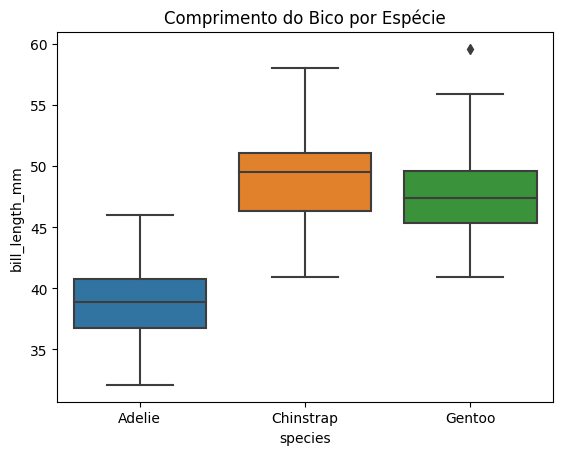

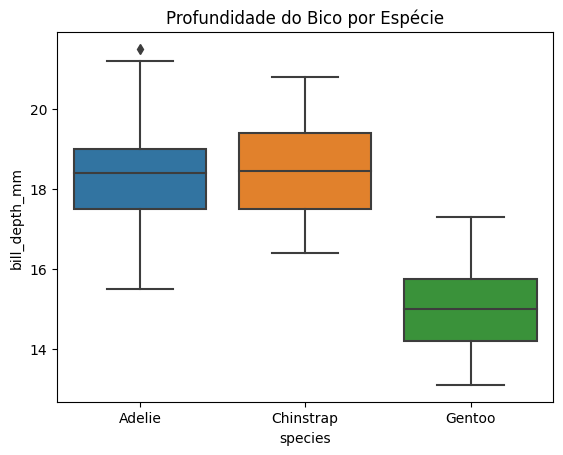

In [32]:
# Análise da Morfologia do Bico por Espécie

sns.boxplot(x='species', y='bill_length_mm', data=df_cleaned)
plt.title('Comprimento do Bico por Espécie')
plt.show()

sns.boxplot(x='species', y='bill_depth_mm', data=df_cleaned)
plt.title('Profundidade do Bico por Espécie')
plt.show()


*Os dois gráficos compararam as dimensões do bico (comprimento e profundidade) entre as três espécies de pinguins: **Adélia**, **Chinstrap** e **Gentoo**.*

1. **Comprimento do Bico**: A espécie **Gentoo** tem a maior média de comprimento, seguida por **Chinstrap** e **Adélia**, com a **Adélia** apresentando a menor variação.
2. **Profundidade do Bico**: **Gentoo** exibe maior variação, enquanto **Adélia** e **Chinstrap** têm profundidades mais consistentes.

Ambos os gráficos mostram a distribuição das medidas de cada espécie, com caixas representando o intervalo interquartil (IQR) e pontos fora da caixa indicando valores discrepantes.

In [23]:
# Análise Descritiva Agrupada
df_cleaned.groupby('species')[['bill_length_mm', 'bill_depth_mm']].describe()


bill_length_mm                                                    \
                   count       mean       std   min     25%    50%     75%   
species                                                                      
Adelie             146.0  38.823973  2.662597  32.1  36.725  38.85  40.775   
Chinstrap           68.0  48.833824  3.339256  40.9  46.350  49.55  51.075   
Gentoo             119.0  47.568067  3.106116  40.9  45.350  47.40  49.600   

                bill_depth_mm                                                 \
            max         count       mean       std   min   25%    50%    75%   
species                                                                        
Adelie     46.0         146.0  18.347260  1.219338  15.5  17.5  18.40  19.00   
Chinstrap  58.0          68.0  18.420588  1.135395  16.4  17.5  18.45  19.40   
Gentoo     59.6         119.0  14.996639  0.985998  13.1  14.2  15.00  15.75   

                 
            max  
species          
Adelie     21.5  
Chinstrap  20.8  
Gentoo     17.3

1. **Adélia:** O comprimento do bico varia de 32.1 mm a 46.0 mm, com uma média de 38.82 mm, e a profundidade do bico varia de 15.5 mm a 21.5 mm, com média de 18.35 mm. Há uma variação moderada na profundidade e comprimento.
2. **Chinstrap:** O comprimento do bico tem uma média maior de 48.83 mm, variando de 40.9 mm a 58.0 mm, e a profundidade do bico também é maior, com média de 18.42 mm e variando de 16.4 mm a 20.8 mm. A espécie Chinstrap tem bicos mais longos e mais profundos em comparação com Adélia.
3. **Gentoo:** Para esta espécie, o comprimento do bico também é maior, com média de 47.57 mm, variando entre 40.9 mm e 59.6 mm, e a profundidade é mais curta em comparação com as outras duas espécies, com média de 14.99 mm e variando entre 13.1 mm e 17.3 mm.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

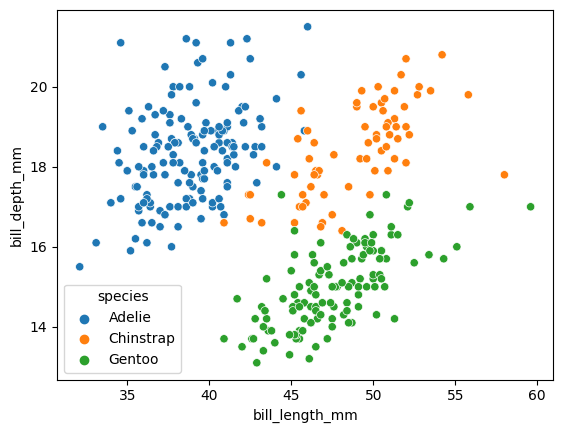

In [28]:
# Relação entre o Comprimento e a Profundidade do Bico dos Pinguins por Espécie
sns.scatterplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', hue='species')

*O gráfico de dispersão exibe a relação entre o comprimento e a profundidade do bico das três espécies de pinguins do Arquipélago Palmer: Adélia, Chinstrap e Gentoo. Cada ponto no gráfico representa uma observação de um pinguim, com as variáveis "bill_length_mm" no eixo x e "bill_depth_mm" no eixo y. A cor de cada ponto corresponde à espécie do pinguim, permitindo uma visualização diferenciada para cada uma das espécies.*

1. *Espécie Adélia: Apresenta uma variação de valores de comprimento de bico e profundidade mais concentrada em valores menores em comparação às outras espécies.*
2. *Espécie Chinstrap: Mostra um intervalo intermediário de valores de comprimento e profundidade do bico.*
3. *Espécie Gentoo: Os pinguins dessa espécie possuem bicos com comprimento e profundidade mais elevados, visíveis no gráfico com uma distribuição mais dispersa em relação às outras espécies.*

In [31]:
# Matriz de correlação
corr = df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

# Formatar a tabela com 2 casas decimais
corr = corr.round(2)

# Exibir a tabela de forma clara
print("Matriz de Correlação Entre as Variáveis Físicas dos Pinguins")
print("\n")
print(corr)

# Legenda
print("\nLegenda:")
print("1. Uma correlação próxima de 1 indica uma relação positiva forte.")
print("2. Uma correlação próxima de -1 indica uma relação negativa forte.")
print("3. Uma correlação próxima de 0 indica nenhuma correlação entre as variáveis.")


Matriz de Correlação Entre as Variáveis Físicas dos Pinguins


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm               1.00          -0.23               0.65   
bill_depth_mm               -0.23           1.00              -0.58   
flipper_length_mm            0.65          -0.58               1.00   
body_mass_g                  0.59          -0.47               0.87   

                   body_mass_g  
bill_length_mm            0.59  
bill_depth_mm            -0.47  
flipper_length_mm         0.87  
body_mass_g               1.00  

Legenda:
1. Uma correlação próxima de 1 indica uma relação positiva forte.
2. Uma correlação próxima de -1 indica uma relação negativa forte.
3. Uma correlação próxima de 0 indica nenhuma correlação entre as variáveis.


1. **Comprimento do Bico (bill_length_mm) e Profundidade do Bico (bill_depth_mm)**: A correlação entre essas duas variáveis é negativa e moderada (-0.23), indicando que, conforme o comprimento do bico aumenta, a profundidade tende a diminuir, embora a relação não seja forte.
2. **Comprimento do Bico (bill_length_mm) e Comprimento da Nadadeira (flipper_length_mm)**: Existe uma correlação positiva forte (0.65), sugerindo que pinguins com bicos mais longos também tendem a ter nadadeiras mais longas.
3. **Comprimento do Bico (bill_length_mm) e Massa Corporal (body_mass_g)**: A correlação positiva moderada (0.59) indica que pinguins com bicos mais longos têm, em média, uma maior massa corporal.
4. **Profundidade do Bico (bill_depth_mm) e Comprimento da Nadadeira (flipper_length_mm)**: A correlação negativa moderada (-0.58) sugere que pinguins com bicos mais profundos tendem a ter nadadeiras menores.
5. **Profundidade do Bico (bill_depth_mm) e Massa Corporal (body_mass_g)**: A correlação negativa moderada (-0.47) indica que pinguins com bicos mais profundos tendem a ter uma massa corporal menor.
6. **Comprimento da Nadadeira (flipper_length_mm) e Massa Corporal (body_mass_g)**: A correlação positiva forte (0.87) mostra que pinguins com nadadeiras mais longas geralmente têm maior massa corporal, o que pode ser esperado, já que nadadeiras maiores são associadas a pinguins mais robustos.

## 2. Perguntas de partida e hipóteses

**2.1 Quais são as principais diferenças morfológicas entre as espécies de pinguins? Como as características como o comprimento e a profundidade do bico, o comprimento da nadadeira e a massa corporal variam entre as espécies (Adélia, Chinstrap, Gentoo)?**

/home/dev_jao/.cache/pypoetry/virtualenvs/src-raGh1dEH-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


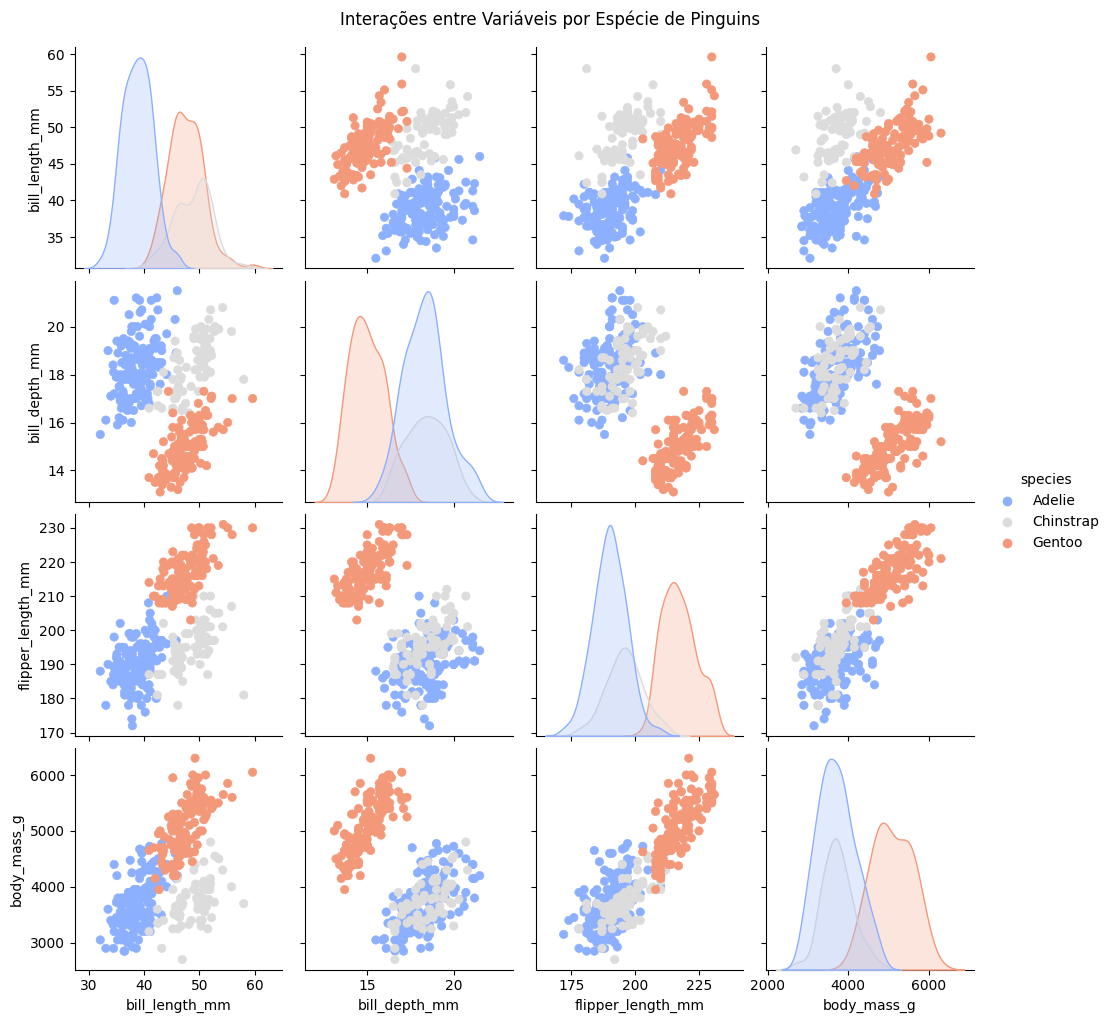

In [43]:
# Definindo as variáveis de interesse para o pairplot
c_palette = 'coolwarm'  # Paleta de cores
bg_color = 'white'      # Cor de fundo do gráfico

# Criação do pairplot com variáveis de interesse e agrupamento por 'species'
sns.pairplot(df_cleaned, 
             vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # Variáveis a serem analisadas
             hue='species',  # Variável para colorir os pontos (espécies de pinguins)
             palette=c_palette,  # Paleta de cores
             plot_kws=dict(edgecolor=None),  # Remover bordas
             diag_kind='kde')  # Tipo de gráfico na diagonal (densidade)

# Título e ajustes
plt.suptitle('Interações entre Variáveis por Espécie de Pinguins', y=1.02)
fig = plt.gcf()
fig.set_facecolor(bg_color)
plt.show()

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

In [47]:
# Calcular a média e desvio padrão para cada variável por espécie
df_cleaned.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].agg(['mean', 'std'])

bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
species                                                                        
Adelie         38.823973  2.662597     18.347260  1.219338        190.102740   
Chinstrap      48.833824  3.339256     18.420588  1.135395        195.823529   
Gentoo         47.568067  3.106116     14.996639  0.985998        217.235294   

                     body_mass_g              
                std         mean         std  
species                                       
Adelie     6.521825  3706.164384  458.620135  
Chinstrap  7.131894  3733.088235  384.335081  
Gentoo     6.585431  5092.436975  501.476154

*As espécies de pinguins possuem características morfológicas distintas que se refletem em suas adaptações evolutivas. O Chinstrap se destaca pelo maior comprimento de bico e maior variação dessa característica, enquanto Gentoo se destaca pela maior massa corporal e comprimento de nadadeira, com Adélia apresentando características intermediárias. Essas diferenças podem ser explicadas por adaptações a diferentes nichos ecológicos e necessidades alimentares de cada espécie.*

**Hipótese Nula (H₀):** Não há diferenças significativas nas características morfológicas entre as espécies de pinguins.
**Hipótese Alternativa (H₁):** Há diferenças significativas nas características morfológicas entre as espécies de pinguins.

In [49]:
from scipy import stats

# ANOVA para cada variável morfológica
anova_results = {}
for var in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    print(f"ANOVA para {var}:")
    # ANOVA entre as ilhas
    groups = [df_cleaned[df_cleaned['island'] == island][var] for island in df_cleaned['island'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    # Armazenando os resultados
    anova_results[var] = {'f_stat': f_stat, 'p_value': p_value}
    print(f"F-statistic: {f_stat}, p-value: {p_value}\n")
    
    # Se o p-value for menor que 0.05, rejeitamos a hipótese nula (diferenças significativas)
    if p_value < 0.05:
        print(f"Resultado significativo para {var}, existe uma diferença entre as ilhas.\n")
    else:
        print(f"Resultado não significativo para {var}, não há diferença entre as ilhas.\n")

ANOVA para bill_length_mm:
F-statistic: 27.471936414321494, p-value: 9.209312496724396e-12

Resultado significativo para bill_length_mm, existe uma diferença entre as ilhas.

ANOVA para bill_depth_mm:
F-statistic: 106.60073091803676, p-value: 1.933065748290906e-36

Resultado significativo para bill_depth_mm, existe uma diferença entre as ilhas.

ANOVA para flipper_length_mm:
F-statistic: 93.93739581642339, p-value: 5.10167479502e-33

Resultado significativo para flipper_length_mm, existe uma diferença entre as ilhas.

ANOVA para body_mass_g:
F-statistic: 105.05868901562252, p-value: 4.9460124907563634e-36

Resultado significativo para body_mass_g, existe uma diferença entre as ilhas.



*As ilhas em que os pinguins habitam influenciam significativamente as características físicas das populações, como o comprimento e a profundidade do bico, o comprimento da nadadeira e a massa corporal. Isso pode ser atribuído a fatores ecológicos e ambientais específicos de cada ilha, como a disponibilidade de recursos alimentares, predadores ou condições climáticas, que podem selecionar características morfológicas específicas para cada local.*
**Comprimento do Bico (bill_length_mm)**:
1. *A diferença nas médias de comprimento do bico entre as ilhas é **significativa** (\( p \)-value = 9.21e-12).*
2. *Isso indica que a ilha onde os pinguins vivem tem um impacto nas diferenças de comprimento do bico entre as populações.*

**Profundidade do Bico (bill_depth_mm)**:
1. *A diferença nas médias de profundidade do bico entre as ilhas é **significativa** (\( p \)-value = 1.93e-36).*
2. *ilha onde os pinguins habitam afeta também as diferenças na profundidade do bico.*

**Comprimento da Nadadeira (flipper_length_mm)**:
1. *A diferença nas médias de comprimento da nadadeira entre as ilhas é **significativa** (\( p \)-value = 5.10e-33).*
2. *Existe uma variação estatisticamente significativa nas nadadeiras dos pinguins dependendo da ilha onde vivem.*

**Massa Corporal (body_mass_g)**:
1. *A diferença nas médias de massa corporal entre as ilhas é **significativa** (\( p \)-value = 4.95e-36).*
2. *A ilha tem um efeito considerável na massa corporal dos pinguins.*

*Hipótese Nula (H₀):* *Não existe diferença significativa nas características morfológicas dos pinguins entre as ilhas*
*Hipótese Alternativa (H₁):* *Existe uma diferença significativa nas características morfológicas dos pinguins entre as ilhas.*

## 3. Insights